[200. 300. 400. 500.]
[102.23024031  42.11158453  25.6120196   17.41146722]
[ 5.13000928e+06 -2.04373327e+00]
BTE fitting =  [ 2.06588130e+08 -2.47132311e+00]


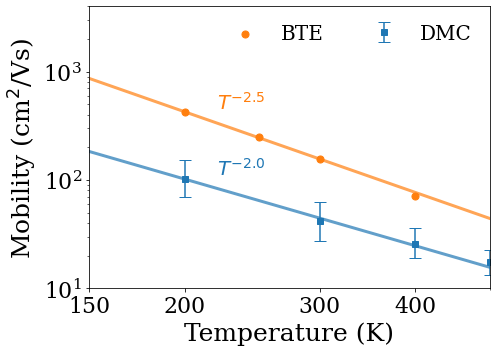

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
plt.rcParams['font.family']="serif"

unit = 4.2543787582E-02

Ts = [200,300,400,500]




plt.figure(figsize=(7,5))
#plt.plot(Ts,mus)
data = np.loadtxt('mu-DMC-xy.dat')
Ts = data[0] 
mut = data[1]
d1 = data[2]
d2 = data[3]


errors = [d1, d2]

plt.errorbar(Ts,mut,yerr=errors,fmt='s',c='tab:blue',capsize=6,label=r'DMC')

import scipy.optimize as opt 

def power_fun(t, a, b):
    return a*t**b
print(Ts)
print(mut)
#z = opt.curve_fit(power_fun, Ts[1:], mut[1:], p0=[1e7, -2])[0]
z = opt.curve_fit(power_fun, Ts, mut, p0=[1e7, -2])[0]
print(z)
x = np.linspace(100,600)
plt.plot(x, power_fun(x, z[0],z[1]),lw=3,alpha=0.7)
plt.text(220,110,r'$T^{-2.0}$', fontsize=20,c='tab:blue')


import scipy.optimize as opt 
def power_fun(t, a, b):
    return a*t**b

## BTE
#add BTE
data = np.loadtxt('mu-BTE-xy.dat')
T = data[0]
mu = data[1]
plt.scatter(T,mu,marker='o',s=50,c='tab:orange',label='BTE')

z = opt.curve_fit(power_fun, T, mu, p0=[1e7, -2])[0]
print('BTE fitting = ',z)
x = np.linspace(100,600)
plt.plot(x, power_fun(x, z[0],z[1]),lw=3,alpha=0.7)
plt.text(220,450,r'$T^{-2.5}$', fontsize=20,c='tab:orange')



plt.xlim(150,500)
plt.ylim(1e1,1e3*4)

plt.semilogx()
plt.semilogy()
plt.minorticks_on()

plt.xlabel('Temperature (K)',fontsize=25)
plt.ylabel('Mobility (cm$^2$/Vs)',fontsize=25)
plt.xticks([150,200,300,400],[150,200,300,400],fontsize=22)
plt.yticks([10,100,1000],fontsize=22)
plt.legend(fontsize=20,frameon=False,ncol=2)
plt.tight_layout()

plt.savefig('fig-5d.pdf',dpi=500)

[200. 300. 400. 500.]
[12.01311234  6.91900622  5.25859546  3.92505003]
[ 8.22750009e+03 -1.23368748e+00]


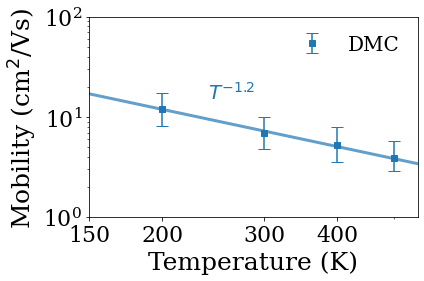

In [6]:
unit = 4.2543787582E-02
data = np.loadtxt('mu-DMC-z.dat')
Ts = data[0]
mut = data[1] 
d1 = data[2]
d2 = data[3]
errors = [d1, d2]


plt.errorbar(Ts,mut,yerr=errors,fmt='s',c='tab:blue',capsize=6,label=r'DMC')


import scipy.optimize as opt 

def power_fun(t, a, b):
    return a*t**b
print(Ts)
print(mut)
z = opt.curve_fit(power_fun, Ts, mut, p0=[1e7, -2])[0]
print(z)
x = np.linspace(100,600)
plt.plot(x, power_fun(x, z[0],z[1]),c='tab:blue',lw=3,alpha=0.7)
plt.text(240,15,r'$T^{-1.2}$', fontsize=20,c='tab:blue')


plt.xlim(150,550)

plt.semilogx()
plt.semilogy()
plt.minorticks_on()

plt.xlabel('Temperature (K)',fontsize=25)
plt.ylabel('Mobility (cm$^2$/Vs)',fontsize=25)
plt.xticks([150,200,300,400],[150,200,300,400],fontsize=22)
plt.yticks([1,10,100],fontsize=22)
plt.legend(fontsize=20,frameon=False)
plt.tight_layout()

plt.savefig('fig-5e.pdf',dpi=400)


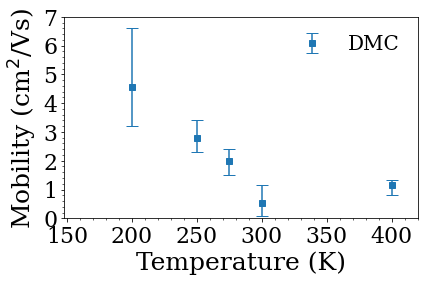

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import os 
rcParams['font.family']="serif"
    
data = np.loadtxt('mu-DMC-xy-rutile.dat')
Ts = data[0]
mut = data[1] 
d_lower = data[2]
d_upper = data[3]
errors = [d_lower, d_upper]
plt.errorbar(Ts,mut,yerr=errors,fmt='s',color='tab:blue',capsize=6,label='DMC')
plt.ylim([0.0,7])
plt.xlim([148,420])
plt.minorticks_on()
plt.xlabel('Temperature (K)',fontsize=25)
plt.ylabel('Mobility (cm$^2$/Vs)',fontsize=25)
plt.xticks([150,200,250,300,350,400],[150,200,250,300,350,400],fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(0,c='k',lw=1)
plt.legend(fontsize=20,frameon=False)
plt.tight_layout()
plt.savefig('fig-5b.pdf', dpi=500)

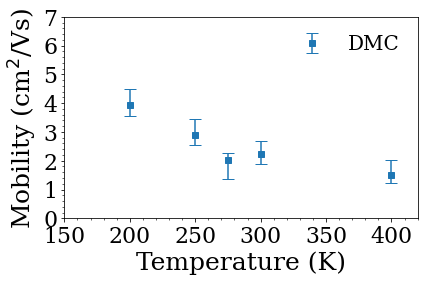

In [16]:
data = np.loadtxt('mu-DMC-z-rutile.dat')
Ts = data[0]
mut = data[1]
d_lower = data[2] 
d_upper = data[3]
errors = [d_lower, d_upper]

plt.errorbar(Ts,mut,yerr=errors,fmt='s',color='tab:blue',capsize=6,label='DMC')
plt.ylim([0,7])
plt.xlim([150,420])
plt.minorticks_on()

plt.xlabel('Temperature (K)',fontsize=25)
plt.ylabel('Mobility (cm$^2$/Vs)',fontsize=25)
plt.xticks([150,200,250,300,350,400],[150,200,250,300,350,400],fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(0,c='k',lw=1)

plt.legend(fontsize=20,frameon=False)
plt.tight_layout()
plt.savefig('fig-5c.pdf', dpi=500)


['band_energy', 'fermi_levels', 'kpoints', 'spectral_functions', 'temperatures', 'w_lower_index', 'w_upper_index', 'wfreq_step_eV'] 

Epol =  -0.17


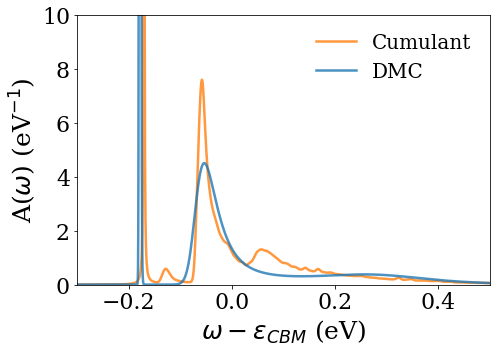

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
f = h5py.File("tio2-gw-elec_spectral_cumulant.h5", "r") 
print( [key for key in f.keys()],'\n' )
Akw = f['spectral_functions']
A0w = np.asarray(Akw['kpt_1'])

w_lower = np.asarray(f['w_lower_index'])
w_upper = np.asarray(f['w_upper_index'])
dw = np.asarray(f['wfreq_step_eV'])

w = np.arange(w_lower,w_upper+1)*dw
A0w[0,0] = A0w[0,0] /(np.sum(A0w[0,0])*dw)
Epol = w[np.argmax(A0w[0,0])]

plt.figure(figsize=(7,5))
plt.plot(w,A0w[0,0],alpha=0.8,c='tab:orange',lw=2.5,label='Cumulant')
print('Epol = ',w[np.argmax(A0w[0,0])])

f.close()
Epeak = -0.17785
x = np.loadtxt('in_tau.out.avspec.dat')
w0=x[np.argmax(x[:,1]),0]
A = x[:,1] * np.heaviside(x[:,0],0)
plt.plot(x[:,0]-w0+Epeak,A,lw=2.5,alpha=0.8,c='tab:blue',label='DMC')
plt.xlim([-0.1,0.5])
plt.legend(fontsize=20,frameon=False)
plt.ylim([0,10])
plt.xlim([-0.3,0.5])
plt.xlabel(r'$\omega-\epsilon_{CBM}$ (eV)',fontsize=25)
plt.ylabel(r'A($\omega$) (eV$^{-1}$)',fontsize=25)
plt.xticks([-0.2,0,0.2,0.4],fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.savefig('fig-5f.pdf', dpi= 500 )


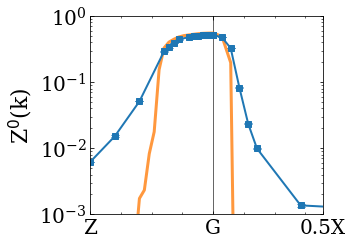

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
plt.rcParams['font.family']="serif"
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
lgz = 0.3977256
lgx = 1.1048324 - lgz

x = np.loadtxt('Zk-anatase.dat')
plt.figure(figsize=(5,3.5))
plt.errorbar(x[0],x[1],yerr=x[2],marker='s',lw=2, capsize=4,c='tab:blue',label='DMC')
plt.xlim([0,lgx*0.5+lgz])
plt.xticks([0,lgz,lgz+0.5*lgx],['Z','G','0.5X'],fontsize=20)
plt.minorticks_on()
plt.tick_params( which='minor', direction='in')
plt.tick_params( which='major', direction='in')
plt.axvline(lgz,c='k',lw=1,alpha=0.6)
plt.axhline(0,c='k',lw=1,alpha=0.6)
plt.yticks(fontsize=20)
plt.ylabel(r'Z$^0$(k)',fontsize=22)

x = np.loadtxt('Zk-cumu-anatase.dat')
plt.plot(x[0],x[1],'-',lw=3,c='tab:orange',alpha=0.8)
plt.ylim([1e-3,1])
plt.semilogy()
plt.tight_layout()
plt.savefig('fig-5-f-inset.pdf', dpi= 500)
